In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv("creditcard.csv")

In [42]:
data=df1

In [43]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [44]:
data.drop(columns=['Time'], inplace=True)

In [45]:
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [46]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

- 로지스틱 회귀

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
pred=lr.predict(X_test)
proba=lr.predict_proba(X_test)[:,1]

accuracy_score(y_test, pred)

0.99916903666772

In [26]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    print(accuracy_score(tgt_test, pred))

- LGBM

In [27]:
from lightgbm import LGBMClassifier

lgbm=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

0.9995201479348805


- 이상치 제거

<AxesSubplot:>

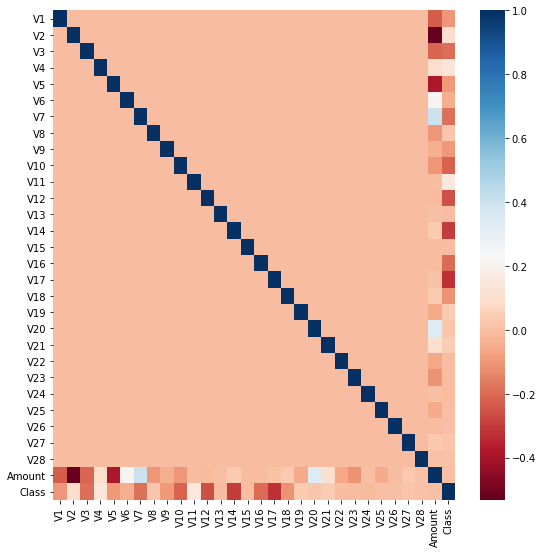

In [28]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr=data.corr()
sns.heatmap(corr, cmap='RdBu')

In [48]:
from imblearn.over_sampling import SMOTE

In [50]:
smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_resample(X_train, y_train)

In [51]:
y_train_over.value_counts()

0    199020
1    199020
Name: Class, dtype: int64